# Introduction to Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, decision tree algorithm can be used for solving regression and classification problems too. The general motive of using Decision Tree is to create a training model which can use to predict class or value of target variables by learning decision rules inferred from training data. The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

#### Decision Tree Algorithm Pseudocode
- Step1: Place the best attribute of the dataset at the root of the tree.
- Step2: Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
- Step3: Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.

<img src="http://drive.google.com/uc?export=view&id=1ZkQy99r9vikzMkXbTNWPrYtYjQQLqtsF" />

In decision trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node. We continue comparing our record’s attribute values with other internal nodes of the tree until we reach a leaf node with predicted class value

#### Assumptions while using Decision tree
- In the beginning, the whole training set is considered at the root.
- Feature values are preferred to be categorical. If values are continuous then they are discretized prior to building the model.
- Records are distributed recursively on the basis of attribute values.
- Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

#### Attributes Selection
The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is known the Attributes Selection. We have different attributes selection measure to identify the attribute which can be considered as the root note at each level. The popular attribute selection measures:
- Information Gain
- Gini index

For more details, you can refer: https://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/

In [2]:
# Import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)

We will be using Balance Scale dataset consists of 5 attributes, 4 as feature attributes and 1 as the target attribute. We will try to build a classifier for predicting the Class attribute. The index of target attribute is 1st. Let's load the dataset and look into various statistics of the dataset.

In [3]:
# Loading Balance Scale dataset
balance_data = pd.read_csv('https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/balance-scale.data.txt', sep= ',', header= None)

print("Dataset Shape: ", balance_data.shape)
print("\nDataset: \n", balance_data.head())
print("\nDataset Statistics: \n", balance_data.describe())

Dataset Shape:  (625, 5)

Dataset: 
    0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5

Dataset Statistics: 
                 1           2           3           4
count  625.000000  625.000000  625.000000  625.000000
mean     3.000000    3.000000    3.000000    3.000000
std      1.415346    1.415346    1.415346    1.415346
min      1.000000    1.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000    2.000000
50%      3.000000    3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000    5.000000


We can see that there are 625 observsations with 4 features and 1 class variable having 3 class i.e. “R” : balance scale tip to the right, “L” : balance scale tip to the left and “B” : balance scale be balanced. Let's separate the features and label from the dataset and then split the dataset into training and test dataset.

In [4]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

#### Decision Tree Training
Now, let's fit Decision tree algorithm on training data, predicting labels for validation dataset and printing the accuracy of the model using various parameters.

DecisionTreeClassifier(): This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:
- criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
- splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
- max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

Let’s build classifiers using criterion as gini index & information gain. We need to fit our classifier using fit(). We will plot our decision tree classifier’s visualization too.

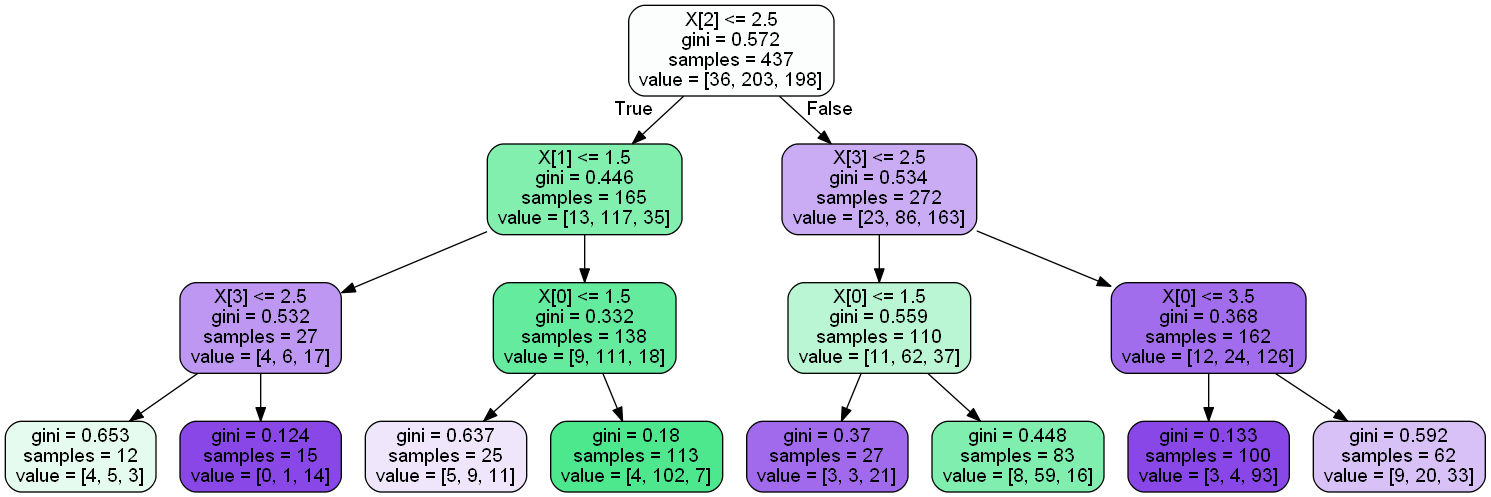

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
tree_gini.fit(X_train, y_train)

dot_data = export_graphviz(tree_gini,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

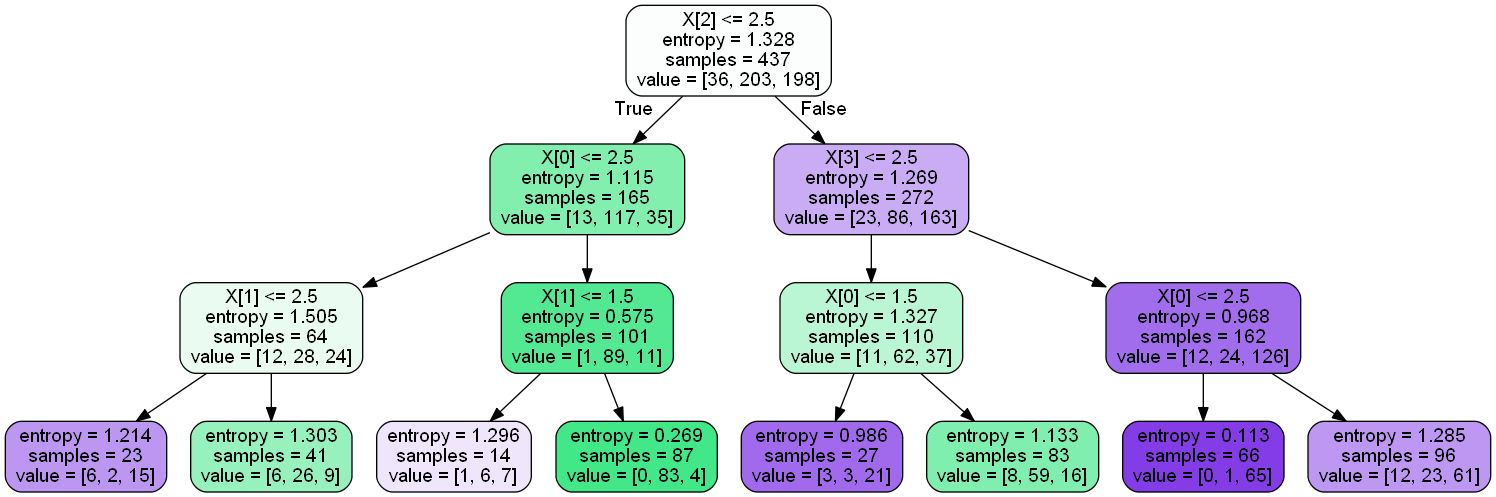

In [6]:
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
tree_entropy.fit(X_train, y_train)

dot_data = export_graphviz(tree_entropy,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Now, we have modeled 2 classifiers. One classifier with gini index & another one with information gain as the criterion. We are ready to predict classes for our test set. Let's predict the class with both the classifier models and compare the accuracy of each model.

In [7]:
y_pred_gini = tree_gini.predict(X_test)

y_pred_en = tree_entropy.predict(X_test)

print("Gini Index Accuracy is ", metrics.accuracy_score(y_test, y_pred_gini)*100)
print("Entropy Accuracy is    ", metrics.accuracy_score(y_test, y_pred_en)*100)

Gini Index Accuracy is  73.4042553191
Entropy Accuracy is     70.7446808511


We can observe that Gini Index model is performing better than entropy model, however, there might be many reasons behind this why Gini model is performing better. Also, based on the dataset, type of features, number of categorical features, etc. will decide the performance of decision tree model between Gini & Entropy type.

The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

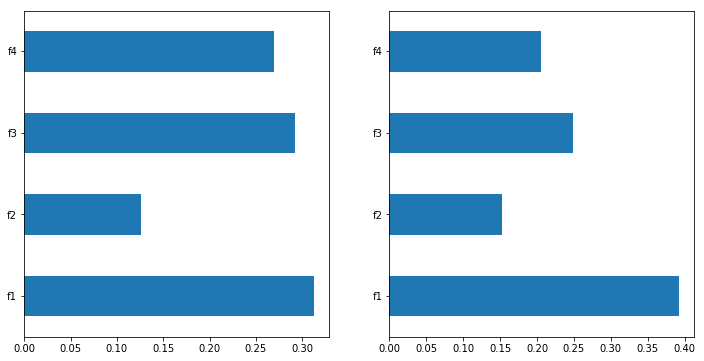

In [8]:
# feature importance
gini_feat_imp = pd.Series(tree_gini.feature_importances_, index=['f1','f2','f3','f4'])
plt.subplot(1,2,1)
gini_feat_imp.plot(kind='barh')

en_feat_imp = pd.Series(tree_entropy.feature_importances_, index=['f1','f2','f3','f4'])
plt.subplot(1,2,2)
en_feat_imp.plot(kind='barh')

plt.show();

### Decision Tree Algorithm Advantages and Disadvantages
Advantages:
- Decision Trees are easy to explain. It results in a set of rules.
- It follows the same approach as humans generally follow while making decisions.
- Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
- The Number of hyper-parameters to be tuned is almost null.

Disadvantages:
- There is a high probability of overfitting in Decision Tree.
- Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
- Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
- Calculations can become complex when there are many class labels.

Let's take another example. We will run decision tree algorirthm on 2 datasets.
- Bill Authentication Dataset with class target variable
- Petrol Consumption Dataset with regressor target variable

In [9]:
# Loading Bill Authentication Dataset
dataset_bill = pd.read_csv("https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/bill_authentication.csv")

print("Dataset Shape: ", dataset_bill.shape)
print("\nDataset: \n", dataset_bill.head())
print("\nDataset Statistics: \n", dataset_bill.describe())

Dataset Shape:  (1372, 5)

Dataset: 
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset Statistics: 
           Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [10]:
X = dataset_bill.drop('Class', axis=1)  
y = dataset_bill['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = DecisionTreeClassifier()  # Running Decision tree model with default parameters
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)

classifier.get_params() # Let's look into the default parameters of model

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [11]:
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_pred))  
print('\nClassification Report: \n',metrics.classification_report(y_test, y_pred)) 
print('\nAccuracy Score: ',metrics.accuracy_score(y_test, y_pred)) 

Confusion Matrix: 
 [[145   2]
 [  4 124]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.97      0.99      0.98       147
          1       0.98      0.97      0.98       128

avg / total       0.98      0.98      0.98       275


Accuracy Score:  0.978181818182


In [12]:
# Loading Petrol Consumption Dataset
dataset_petrol = pd.read_csv('https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/petrol_consumption.csv')

print("Dataset Shape: ", dataset_petrol.shape)
print("\nDataset: \n", dataset_petrol.head())
print("\nDataset Statistics: \n", dataset_petrol.describe())

Dataset Shape:  (48, 5)

Dataset: 
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Dataset Statistics: 
        Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50% 

In [13]:
X = dataset_petrol.drop('Petrol_Consumption', axis=1)  
y = dataset_petrol['Petrol_Consumption']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

regressor = DecisionTreeRegressor()  # Running Decision tree model with default parameters
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test) 

regressor.get_params() # Let's look into the default parameters of model

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [14]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df['Residuals'] = df['Actual'] - df['Predicted']
df.describe()

,Actual,Predicted,Residuals
count,10.000000,10.000000,10.000000
mean,549.400000,543.000000,6.400000
std,80.687601,87.939373,75.265751
min,410.000000,414.000000,-161.000000
25%,498.750000,483.000000,-10.750000
50%,574.000000,550.500000,10.000000
75%,579.250000,616.750000,51.500000
max,704.000000,648.000000,116.000000


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 52.8
Mean Squared Error: 5139.4
Root Mean Squared Error: 71.689608731
